In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import scipy.optimize

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [7]:
def monoExp(x, C, t2, A):
    return C * np.exp(-x/t2) + A
def monoExp2(x,params):  
#     C=15.028
    C=params[0]
    t2=params[1]
    A=params[2]
#     A=1
#     C=C
#     A=0
    return C * np.exp(-x/t2) + A


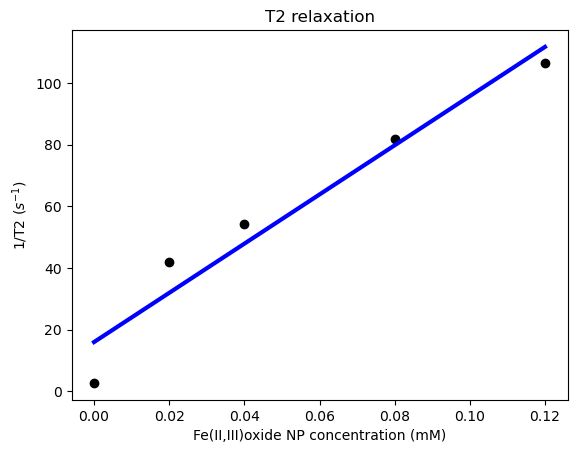

In [7]:
plt.scatter(C, 1000/T2, color="black")
plt.plot(C, line_pred, color="blue", linewidth=3)
plt.title("T2 relaxation")
plt.xlabel("Fe(II,III)oxide NP concentration (mM)")
plt.ylabel("1/T2 ($s^{-1}$)")
plt.savefig("t2_relaxation.pdf")

In [20]:
(111.66286734-16.02034065)/0.12

797.0210557500001

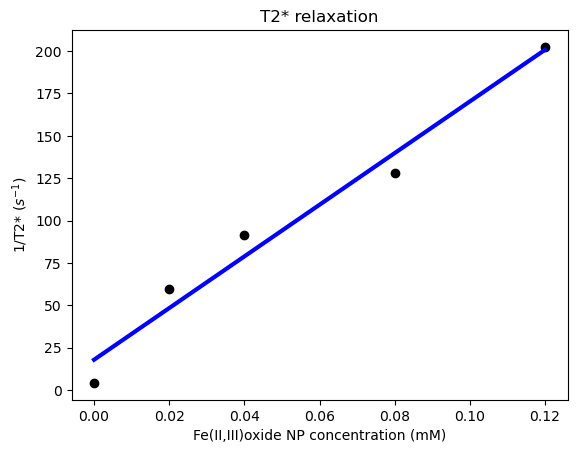

In [6]:
plt.scatter(C, 1000/T2star, color="black")
plt.plot(C, T2star_line_pred, color="blue", linewidth=3)
plt.title("T2* relaxation")
plt.xlabel("Fe(II,III)oxide NP concentration (mM)")
plt.ylabel("1/T2* ($s^{-1}$)")
plt.savefig("t2star_relaxation.pdf")

In [14]:
(T2star_line_pred[-1]-T2star_line_pred[0])/0.12

1523.5303085515802

In [15]:
(line_pred[-1]-line_pred[0])/0.12

array([797.02105574])

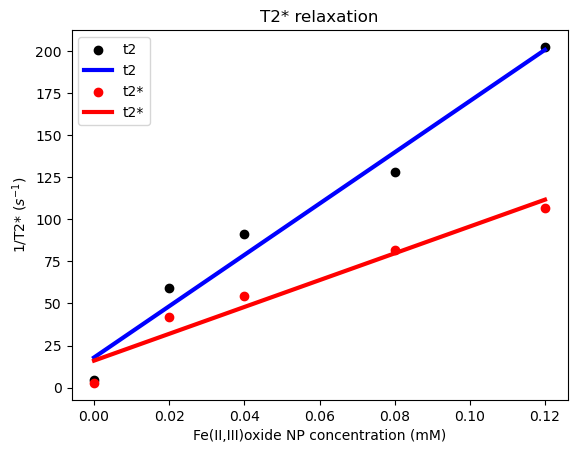

In [13]:
plt.scatter(C, 1000/T2star, color="black")
plt.plot(C, T2star_line_pred, color="blue", linewidth=3)
plt.scatter(C, 1000/T2, color="red")
plt.plot(C, line_pred, color="red", linewidth=3)
plt.title("T2* relaxation")
plt.xlabel("Fe(II,III)oxide NP concentration (mM)")
plt.ylabel("1/T2* ($s^{-1}$)")
plt.legend(["t2*","t2*","t2","t2"])
plt.savefig("relaxation.pdf")

# rEO_06 T2* Relaxation

In [4]:
echo = np.array([4.00, 9.00, 14.00, 19.00, 24.00, 29.00, 34.00, 39.00]).reshape(-1,1)
echo_el = np.array([0, 4.00, 9.00, 14.00, 19.00, 24.00, 29.00, 34.00, 39.00]).reshape(-1,1)
electrode = np.array([3.88, 2.15, 1.45, 1.36, 1.26, 1.36, 1.17, 1.34])
sigma_electrode = np.array([1.81, 1.15, 0.73, 0.80, 0.66, 0.66, 0.55, 0.62])
tissue = np.array([7.09, 2.89, 1.56, 1.21, 1.01, 0.9, 0.84, 0.81])
sigma_tissue = np.array([1.24, 1.63, 0.85, 0.70, 0.56, 0.49, 0.44, 0.43])

p0 = (11.33, 0.2, 0)

In [5]:
# 19.12.2023 scan
el_20231219 = np.array([4.49, 2.32, 1.44, 1.44, 1.32, 1.26, 1.15, 1.38])
s_el_20231219 = np.array([1.99, 1.07, 0.65, 0.74, 0.61, 0.65, 0.53, 0.73])
tis_20231219 = np.array([8.33, 5.21, 3.16, 2.08, 1.64, 1.34, 1.13, 1.02])
s_tis_20231219 = np.array([2.28, 2.83, 2.54, 2.05, 1.55, 1.25, 1.00, 0.83])

# 01.02.2024 scan
el_20240201 = np.array([5.44, 3.27, 1.84, 2.03, 2.17, 1.33, 1.24, 1.60])
s_el_20240201 = np.array([2.7, 1.12, 1.2, 1.19, 0.72, 0.75, 0.72, 0.99])
tis_20240201 = np.array([9.17, 6.04, 3.49, 2.59, 2.12, 1.88, 1.65, 1.6])
s_tis_20240201 = np.array([1.91, 2.43, 2.32, 1.75, 1.33, 1.11, 0.92, 0.85])

# 07.03.2024 scan
el_20240307 = np.array([5.94, 2.64, 1.09, 1.03, 0.81, 0.82, 0.74, 0.89])
s_el_20240307 = np.array([2.54, 1.5, 0.58, 0.67, 0.35, 0.46, 0.35, 0.44])
tis_20240307 = np.array([8.59, 4.72, 2.45, 1.52, 1.22, 1.00, 0.87, 0.82])
s_tis_20240307 = np.array([1.92, 2.51, 1.82, 1.23, 0.88, 0.63, 0.5, 0.43])



## 12.19.2023

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
11.907347505761512 117.1326344183091 0.9051994366004107


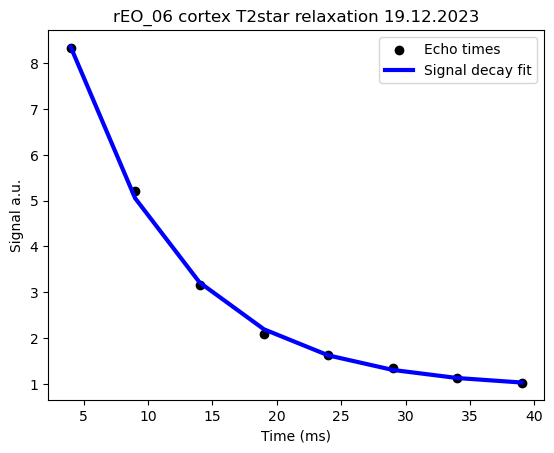

In [8]:
p0 = (11, 0.2, 0)
params, cv = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), tis_20231219, p0, sigma=s_tis_20231219)
C, t2, A = params
plt.scatter(echo, tis_20231219, color="black")
plt.plot(echo, monoExp(echo, C, t2, A), color="blue", linewidth=3)
print( C, 1000/t2, A)
plt.title("rEO_06 cortex T2star relaxation 19.12.2023")
plt.ylabel("Signal a.u.")
plt.xlabel("Time (ms)")
plt.legend(["Echo times", "Signal decay fit"])
plt.savefig("./data/rEO_06/relaxivity/tissue-t2star-20231219.pdf")

11.907347375823806Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
 117.13263190813761 0.9051994163278614
11.807347375824824 296.48124605867963 1.2799008377050882


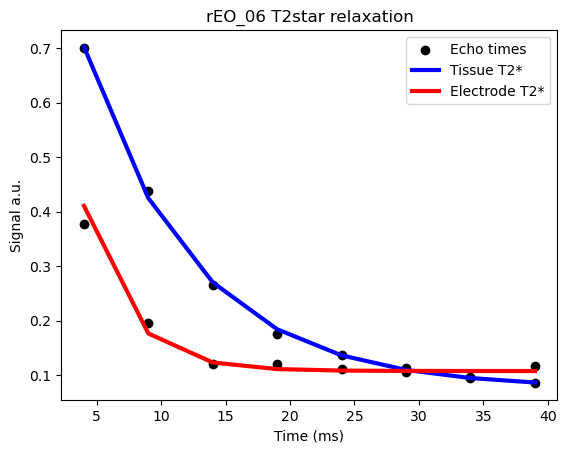

11.601071805594236 79.59366455741528 0.7428055879606194
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
11.501071805594243 174.4059299268759 1.0146757804463988


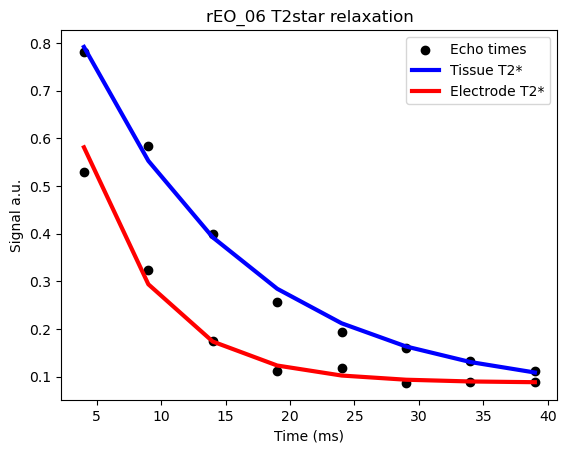

In [9]:
# 19.12.2023 scan
el_20231219 = np.array([4.49, 2.32, 1.44, 1.44, 1.32, 1.26, 1.15, 1.38])
s_el_20231219 = np.array([1.99, 1.07, 0.65, 0.74, 0.61, 0.65, 0.53, 0.73])
tis_20231219 = np.array([8.33, 5.21, 3.16, 2.08, 1.64, 1.34, 1.13, 1.02])
s_tis_20231219 = np.array([2.28, 2.83, 2.54, 2.05, 1.55, 1.25, 1.00, 0.83])

p0 = (11, 5, 1)

params, cv = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), tis_20231219, p0, s_tis_20231219)
C, t2, A = params
print( C, 1000/t2, A)
p0 = (C, 0.2,  1)
params2, cv2 = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), el_20231219, p0, s_el_20231219, bounds=([C-0.1, -np.inf, -np.inf], [C+0.1,np.inf, np.inf]))
C2, t2_2, A2 = params2
print(C2, 1000/t2_2, A2)
plt.scatter(echo, tis_20231219/C, color="black")
# plt.errorbar(echo, tissue, yerr=sigma_tissue, fmt='o', color="black")
plt.plot(echo, monoExp(echo, C, t2, A)/C, color="blue", linewidth=3)
plt.plot(echo, monoExp(echo, C2, t2_2, A2)/C, color="red", linewidth=3)
plt.scatter(echo, el_20231219/C, color="black")
plt.title("rEO_06 T2star relaxation")
plt.ylabel("Signal a.u.")
plt.xlabel("Time (ms)")
plt.legend(["Echo times", "Tissue T2*", "Electrode T2*"])
plt.savefig("./data/rEO_06/relaxivity/comparison-t2star-20231219.pdf")
plt.show()

# 19.12.2023 scan - slice2
el_20231219 = np.array([6.15, 3.76, 2.03, 1.29, 1.37, 1.01, 1.03, 1.04])
s_el_20231219 = np.array([1.66, 1.15, 1.09, 0.62, 0.54, 0.53, 0.48, 0.62])
tis_20231219 = np.array([9.06, 6.76, 4.63, 2.97, 2.26, 1.86, 1.55, 1.31])
s_tis_20231219 = np.array([1.63, 1.9, 2.29, 2.33, 1.98, 1.58, 1.34, 1.06])

params, cv = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), tis_20231219, p0, s_tis_20231219)
C, t2, A = params
print( C, 1000/t2, A)
p0 = (C, 0.2,  1)
params2, cv2 = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), el_20231219, p0, s_el_20231219, bounds=([C-0.1, -np.inf, -np.inf], [C+0.1,np.inf, np.inf]))
C2, t2_2, A2 = params2
print(C2, 1000/t2_2, A2)
plt.scatter(echo, tis_20231219/C, color="black")
# plt.errorbar(echo, tissue, yerr=sigma_tissue, fmt='o', color="black")
plt.plot(echo, monoExp(echo, C, t2, A)/C, color="blue", linewidth=3)
plt.plot(echo, monoExp(echo, C2, t2_2, A2)/C, color="red", linewidth=3)
plt.scatter(echo, el_20231219/C, color="black")
plt.title("rEO_06 T2star relaxation")
plt.ylabel("Signal a.u.")
plt.xlabel("Time (ms)")
plt.legend(["Echo times", "Tissue T2*", "Electrode T2*"])
plt.savefig("./data/rEO_06/relaxivity/comparison-t2star-20231219-s2.pdf")



## 01.02.2024

tissueIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

79.59366455741528
12.740189600154368 124.14565734501102 1.4840659015190276
electrode
12.730189600154434 240.18666362679312 1.590041917061702
240.18666362679312


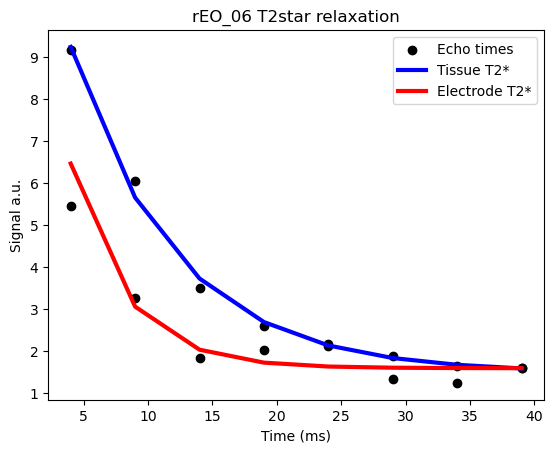

In [10]:
# 01.02.2024 scan
el_20240201 = np.array([5.44, 3.27, 1.84, 2.03, 2.17, 1.33, 1.24, 1.60])
s_el_20240201 = np.array([2.7, 1.12, 1.2, 1.19, 0.72, 0.75, 0.72, 0.99])
tis_20240201 = np.array([9.17, 6.04, 3.49, 2.59, 2.12, 1.88, 1.65, 1.6])
s_tis_20240201 = np.array([1.91, 2.43, 2.32, 1.75, 1.33, 1.11, 0.92, 0.85])

p0 = (11, 5, 1)

params, cv = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), tis_20240201, p0, s_tis_20240201)
p_sigma = np.sqrt(np.diag(cv))
print('tissue')
print(1000/t2)
C, t2, A = params
print( C, 1000/t2, A)
p0 = (C, 5, 1)

params2, cv2 = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), el_20240201, p0, s_el_20240201, bounds=([C-0.01, -np.inf, -np.inf], [C+0.01,np.inf, np.inf]))
print("electrode")
C2, t2_2, A2 = params2
print(C2, 1000/t2_2, A2)
p_sigma2 = np.sqrt(np.diag(cv2))
print(1000/t2_2)
el_20240201_scaled=el_20240201/C2
s_el_20240201_scaled=s_el_20240201/C2

plt.scatter(echo, tis_20240201, color="black")
# plt.errorbar(echo, tissue, yerr=sigma_tissue, fmt='o', color="black")
plt.plot(echo, monoExp(echo, C, t2, A), color="blue", linewidth=3)
plt.plot(echo, monoExp(echo, C2, t2_2, A2), color="red", linewidth=3)
plt.scatter(echo, el_20240201, color="black")
plt.title("rEO_06 T2star relaxation")
plt.ylabel("Signal a.u.")
plt.xlabel("Time (ms)")
plt.legend(["Echo times", "Tissue T2*", "Electrode T2*"])
plt.savefig("./data/rEO_06/relaxivity/comparison-t2star-20240201.pdf")
plt.show()


## 03.07.2024

tissueIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

14.243087024745952 149.49463866546853 0.7857606731723528
149.49463866546853
251.39275151999186
14.343087024745405 251.39275151999186 0.7930566147251384


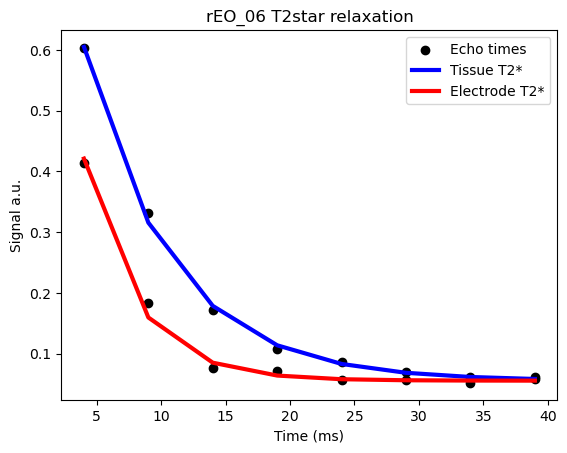

In [11]:
# 07.03.2024 scan
el_20240307 = np.array([5.94, 2.64, 1.09, 1.03, 0.81, 0.82, 0.74, 0.89])
s_el_20240307 = np.array([2.54, 1.5, 0.58, 0.67, 0.35, 0.46, 0.35, 0.44])
tis_20240307 = np.array([8.59, 4.72, 2.45, 1.52, 1.22, 1.00, 0.87, 0.82])
s_tis_20240307 = np.array([1.92, 2.51, 1.82, 1.23, 0.88, 0.63, 0.5, 0.43])
p0 = (11, 10, 0)

params, cv = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), tis_20240307, p0, s_tis_20240307, absolute_sigma=False)
p_sigma = np.sqrt(np.diag(cv))
C, t2, A = params
print('tissue')
print( C, 1000/t2, A)
print(1000/t2)
p0 = (C, 0.2, A)


params2, cv2 = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), el_20240307, p0, s_el_20240307,absolute_sigma=False, bounds=([C-0.1, -np.inf, -np.inf], [C+0.1,np.inf, np.inf]))
C2, t2_2, A2 = params2
p_sigma2 = np.sqrt(np.diag(cv2))
print(1000/t2_2)
print(C2, 1000/t2_2, A2)

el_20240307_scaled=el_20240307/C2
s_el_20240307_scaled=s_el_20240307/C2

plt.scatter(echo, tis_20240307/C, color="black")
# plt.errorbar(echo, tissue, yerr=sigma_tissue, fmt='o', color="black")
plt.plot(echo, monoExp(echo, C, t2, A)/C, color="blue", linewidth=3)
plt.plot(echo, monoExp(echo, C2, t2_2, A2)/C2, color="red", linewidth=3)
plt.scatter(echo, el_20240307/C2, color="black")
plt.title("rEO_06 T2star relaxation")
plt.ylabel("Signal a.u.")
plt.xlabel("Time (ms)")
plt.legend(["Echo times", "Tissue T2*", "Electrode T2*"])
plt.savefig("./data/rEO_06/relaxivity/comparison-t2star-20240307.pdf")
plt.show()

# 01.02.2024 scan - slice 2
# el_20240307 = np.array([7.75, 4.20, 1.57, 0.8, 0.73, 0.8, 0.88, 0.72])
# s_el_20240307 = np.array([1.73, 1.31, 0.79, 0.47, 0.34, 0.62, 0.41, 0.31])
# tis_20240307 = np.array([9.73, 6.7, 3.93, 2.37, 1.9, 1.57, 1.29, 1.1])
# s_tis_20240307 = np.array([1.48, 1.96, 2.38, 2.23, 1.8, 1.47, 1.14, 0.88])

# params, cv = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), tis_20240307, p0, s_tis_20240307)
# C, t2, A = params
# print( C, 1000/t2, A)
# p0 = (C, 5, 1)
# # params2, cv2 = scipy.optimize.curve_fit(monoExp2, echo.reshape(8,), el_20240201, p0, s_el_20240201)
# params2, cv2 = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), el_20240307, p0, s_el_20240307,absolute_sigma=True, bounds=([C-0.1, -np.inf, -np.inf], [C+0.1,np.inf, np.inf]))

# C2, t2_2, A2 = params2
# print(C2, 1000/t2_2, A2)
# plt.scatter(echo, tis_20240307/C, color="black")
# # plt.errorbar(echo, tissue, yerr=sigma_tissue, fmt='o', color="black")
# plt.plot(echo, monoExp(echo, C, t2, A)/C, color="blue", linewidth=3)
# plt.plot(echo, monoExp(echo, C2, t2_2, A2)/C2, color="red", linewidth=3)
# plt.scatter(echo, el_20240307/C2, color="black")
# plt.title("rEO_06 T2star relaxation")
# plt.ylabel("Signal a.u.")
# plt.xlabel("Time (ms)")
# plt.legend(["Echo times", "Tissue T2*", "Electrode T2*"])
# plt.savefig("./data/rEO_06/relaxivity/comparison-t2star-20240307-s2.pdf")
# print(t2, t2_2)

In [12]:
import numpy as np
from scipy.stats import chi2

c1=12.740189600154368
c2=14.243087024745952

b2=0.7926385897865695
b1=1.590041917061702
elc1=(el_20240201-b1)
elc2=(el_20240307-b2)


tis2= (np.array([8.59, 4.72, 2.45, 1.52, 1.22, 1.00, 0.87, 0.82])-b2)
s2=s_tis_20240307

s_diff=np.sqrt((s_el_20240307)**2 + (s_el_20240201)**2)

chi_elc=np.divide((elc2-elc1),s_diff)**2
np.sum(chi2)
print(1-chi2.cdf([np.sum(chi_elc)], 8))

# chi2.cdf([0], 8)

s_diff=np.sqrt((s_el_20240307)**2 + (s2)**2)

chi_2=np.divide((elc2-tis2),s_diff)**2
np.sum(chi2)
print(1-chi2.cdf([np.sum(chi_2)], 8))



[0.99881023]
[0.97686965]


# rEO_06 small roi, post-recovery vs 4months

In [15]:
echo = np.array([4.00, 9.00, 14.00, 19.00, 24.00, 29.00, 34.00, 39.00]).reshape(-1,1)

# 19.12.2023 scan
el_1 = np.array([5.25, 2.97, 1.76, 1.57, 1.20, 1.03, 1.03, 1.12])
s_el_1 = np.array([1.97, 1.66, 1.02, 0.87, 0.60, 0.67, 0.49, 0.59])
tis_1 = np.array([7.93, 4.18, 1.39, 1.02, 1.09, 0.77, 0.85, 0.78])
s_tis_1 = np.array([0.63, 0.67, 0.66, 0.51, 0.44, 0.43, 0.34, 0.34])

# 05.04.2024 scan
el_2 = np.array([6.98, 3.84, 1.79, 1.48, 0.91, 0.81, 0.8, 0.64])
s_el_2 = np.array([2.2, 1.8, 1.25, 1.1, 0.57, 0.44, 0.44, 0.37])
tis_2 = np.array([9.74, 5.28, 1.58, 1.73, 1.24, 0.78, 0.64, 0.85])
s_tis_2 = np.array([0.68, 0.62, 0.85, 0.89, 0.68, 0.40, 0.34, 0.44])


p0 = (11, 10, 0)

tissue
15.130883250976943 183.36297839443927 0.7571298134193379
183.36297839443927
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
electrode
15.120883250976945 279.4762303634529 1.1479928313365377
279.4762303634529


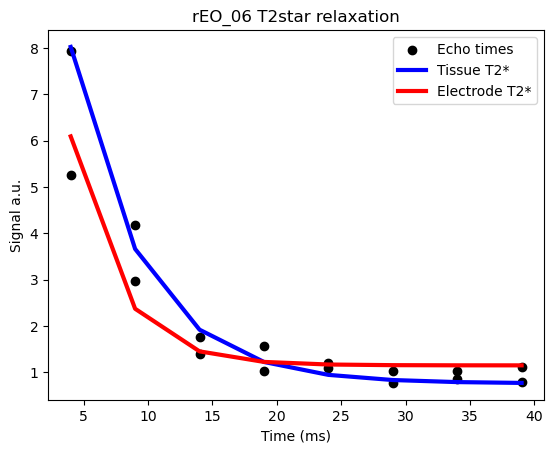

In [16]:
params, cv = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), tis_1, p0, s_tis_1)
C, t2, A = params
p_sigma = np.sqrt(np.diag(cv))
# print( C, 1000/t2, A)
# print(1000/ (t2+p_sigma[1]))
# print(1000/ (t2-p_sigma[1]))
C, t2, A = params
print('tissue')
print( C, 1000/t2, A)
print(1000/t2)

p0 = (C, 5, 1)


# params2, cv2 = scipy.optimize.curve_fit(monoExp2, echo.reshape(8,), el_20240201, p0, s_el_20240201)
params2, cv2 = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), el_1, p0, s_el_1, bounds=([C-0.01, -np.inf, -np.inf], [C+0.01,np.inf, np.inf]))
print("electrode")
C2, t2_2, A2 = params2
print(C2, 1000/t2_2, A2)
p_sigma2 = np.sqrt(np.diag(cv2))
print(1000/t2_2)

el_1_scaled=el_1/15
s_el_1_scaled=s_el_1/C2


plt.scatter(echo, tis_1, color="black")
# plt.errorbar(echo, tissue, yerr=sigma_tissue, fmt='o', color="black")
plt.plot(echo, monoExp(echo, C, t2, A), color="blue", linewidth=3)
plt.plot(echo, monoExp(echo, C2, t2_2, A2), color="red", linewidth=3)
plt.scatter(echo, el_1, color="black")
plt.title("rEO_06 T2star relaxation")
plt.ylabel("Signal a.u.")
plt.xlabel("Time (ms)")
plt.legend(["Echo times", "Tissue T2*", "Electrode T2*"])
plt.savefig("./data/rEO_06/relaxivity/small_tiss_roi_20231219.pdf")
plt.show()

tissueIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

17.130178745899098 155.1712202654388 0.635228273029119
155.1712202654388
electrode
17.1201787458991 209.37669980226926 0.7467708203704876
209.37669980226926


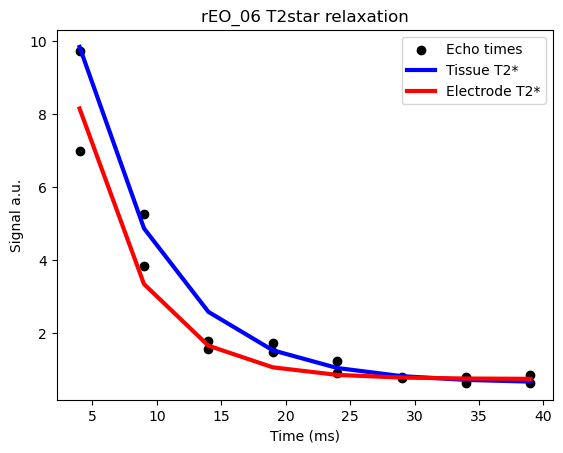

In [21]:
params, cv = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), tis_2, p0, s_tis_2)
C, t2, A = params
p_sigma = np.sqrt(np.diag(cv))

C, t2, A = params
print('tissue')
print( C, 1000/t2, A)
print(1000/t2)

p0 = (C, 5, 1)
tis_2_scaled = tis_2/C
s_tis_2_scaled = s_tis_2/C

params2, cv2 = scipy.optimize.curve_fit(monoExp, echo.reshape(8,), el_2, p0, s_el_2, bounds=([C-0.01, -np.inf, -np.inf], [C+0.01,np.inf, np.inf]))
print("electrode")
C2, t2_2, A2 = params2
print(C2, 1000/t2_2, A2)
p_sigma2 = np.sqrt(np.diag(cv2))
print(1000/t2_2)

el_2_scaled = el_2/C2
s_el_2_scaled = s_el_2/C2

plt.scatter(echo, tis_2, color="black")
# plt.errorbar(echo, tissue, yerr=sigma_tissue, fmt='o', color="black")
plt.plot(echo, monoExp(echo, C, t2, A), color="blue", linewidth=3)
plt.plot(echo, monoExp(echo, C2, t2_2, A2), color="red", linewidth=3)
plt.scatter(echo, el_2, color="black")
plt.title("rEO_06 T2star relaxation")
plt.ylabel("Signal a.u.")
plt.xlabel("Time (ms)")
plt.legend(["Echo times", "Tissue T2*", "Electrode T2*"])
plt.savefig("./data/rEO_06/relaxivity/small_tiss_roi_20240405.pdf")
plt.show()

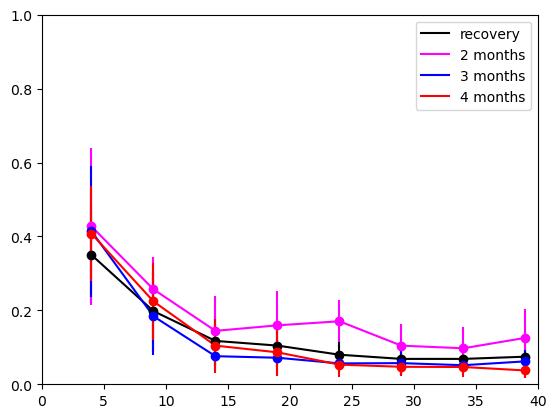

In [24]:
fig, ax=plt.subplots()

# Tissue
# plt.errorbar(echo, tis_2_scaled, yerr=s_tis_2_scaled, fmt='o', color="black")
# plt.plot(echo, tis_2_scaled, color="black")

# 19.12.2023 scan
plt.errorbar(echo, el_1_scaled, yerr=s_el_1_scaled, fmt='o', color="black")
plt.plot(echo, el_1_scaled, color="black")

#01.02.2024 scan
plt.errorbar(echo, el_20240201_scaled,yerr=s_el_20240201_scaled,fmt='o',  color='magenta')
plt.plot(echo, el_20240201_scaled, color="magenta")

#07.03.2024 scan
plt.errorbar(echo, el_20240307_scaled,yerr=s_el_20240307_scaled,fmt='o',  color='blue')
plt.plot(echo, el_20240307_scaled, color="blue")

# 05.04.2024 scan
# ax.fill_between(echo[:,0], monoExp2(echo, params-p_sigma)[:,0], monoExp2(echo, params+p_sigma)[:,0], alpha=0.2, color='red')
plt.errorbar(echo, el_2_scaled, yerr=s_el_2_scaled, fmt='o', color="red")
plt.plot(echo, el_2_scaled, color="red")




plt.legend(["recovery", "2 months", "3 months", "4 months"])
plt.ylim([0, 1])
plt.xlim([0, 40])
plt.savefig("./data/rEO_06/relaxivity/all_comparison.pdf")

In [39]:
np.append([0], echo)

array([ 0.,  4.,  9., 14., 19., 24., 29., 34., 39.])